# Image Classification Using CNN 
- Classifies whether the image is a Dog or a Cat

Importing dependencies

In [20]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D , MaxPool2D , Flatten , Dense

Importing and Analyzing Dataset

In [21]:
X_train = pd.read_csv('data/input.csv' , delimiter= ',')
Y_train = pd.read_csv('data/labels.csv' , delimiter= ',')

X_test = pd.read_csv('data/input_test.csv' , delimiter= ',')
Y_test = pd.read_csv('data/labels_test.csv' , delimiter=',')

In [22]:

# Converting dataframe into numpy

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()
Y_test = Y_test.to_numpy()
Y_train = Y_train.to_numpy()

In [24]:
# Reshaping the Inputs

X_train = X_train.reshape(len(X_train) , 100 , 100 , 3)
X_test = X_test.reshape(len(X_test) , 100 , 100 , 3)


In [25]:
print('The Shape of X_train is :' , X_train.shape)
print('The Shape of Y_train is :' , Y_train.shape)
print('The Shape of X_test is :' , X_test.shape)
print('The Shape of Y_test is :' , Y_test.shape)

The Shape of X_train is : (1999, 100, 100, 3)
The Shape of Y_train is : (1999, 1)
The Shape of X_test is : (399, 100, 100, 3)
The Shape of Y_test is : (399, 1)


In [26]:
# Normalizing the inputs

X_train = X_train / 255.0
X_test = X_test / 255.0

In [29]:
X_test[1].shape

(100, 100, 3)

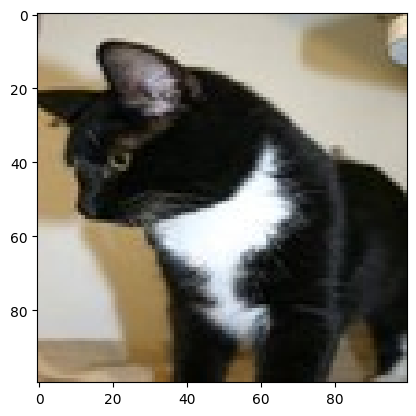

In [37]:
# Displaying the Training Data

index = np.random.randint(0 , len(X_train))
plt.imshow(X_train[index])

Model Development

In [41]:
model = Sequential([

 Conv2D(32 , (3,3) , activation= 'relu' , input_shape = (100 , 100 ,3)),
 MaxPool2D((2,2)), 

 Conv2D(32 , (3,3) , activation='relu'),
 MaxPool2D((2,2)),

 Conv2D(32 , (3,3) , activation='relu'),
 MaxPool2D((2,2)),

 Flatten(),
 Dense(128 , activation = 'relu'),
 Dense(1 , activation = 'sigmoid')

])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 21, 21, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 429,249 (1.64 MB)

 Trainable params: 429,249 (1.64 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer= 'adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])



In [48]:
model_history = model.fit(X_train , Y_train , batch_size= 50 , epochs= 10 , validation_split= 0.2)

Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 124ms/step - accuracy: 0.9691 - loss: 0.0752 - val_accuracy: 0.9575 - val_loss: 0.1586
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 114ms/step - accuracy: 0.9948 - loss: 0.0276 - val_accuracy: 0.9175 - val_loss: 0.1923
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 112ms/step - accuracy: 0.9984 - loss: 0.0156 - val_accuracy: 0.9575 - val_loss: 0.1385
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 109ms/step - accuracy: 1.0000 - loss: 0.0133 - val_accuracy: 0.9625 - val_loss: 0.1040
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9987 - loss: 0.0113 - val_accuracy: 0.9200 - val_loss: 0.2069
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 110ms/step - accuracy: 0.9978 - loss: 0.0130 - val_accuracy: 0.8100 - val_loss: 0.4966
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 113ms/step - accuracy: 0.9983 - loss: 0.0176 - val_accuracy: 0.9150 - val_loss: 0.2056
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 118ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.

In [49]:
results = model.evaluate(X_test , Y_test , verbose=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7418 - loss: 1.4301


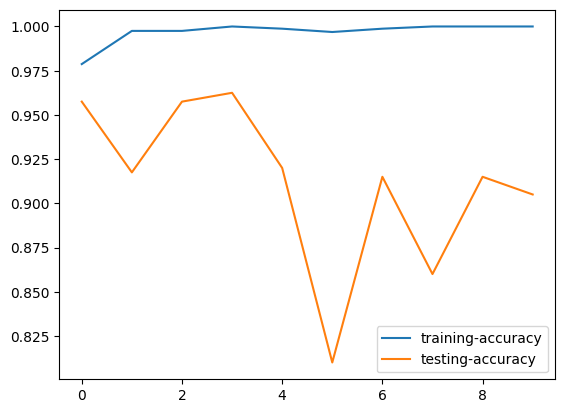

In [50]:
plt.plot(model_history.history['accuracy'] , label = 'training-accuracy')
plt.plot(model_history.history['val_accuracy'] , label = 'testing-accuracy')
plt.legend(loc = 'lower right')

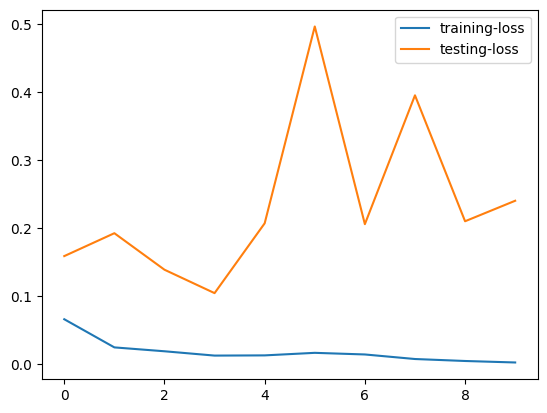

In [52]:
plt.plot(model_history.history['loss'] , label = 'training-loss')
plt.plot(model_history.history['val_loss'] , label = 'testing-loss')
plt.legend(loc = 'upper right')

Making predictions

In [53]:
y_pred = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


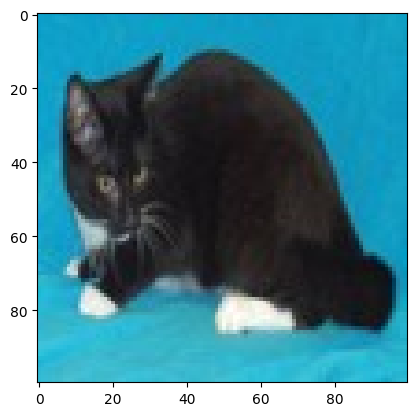

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
[[0.9995595]]
This is a Cat


In [68]:
img_indx = np.random.randint(0,len(X_test))
plt.imshow(X_test[img_indx])
plt.show()

y_hat = model.predict(X_test[img_indx].reshape(1 , 100 ,100 ,3))
print(y_hat)

y_hat = y_hat > 0.5

if  y_hat == 0:
  
  print('This is a Dog')

else:
  
  print('This is a Cat')


In [64]:
y_pred[0]

array([0.00426491], dtype=float32)